In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
GOOGLE_COLAB = True

In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
from nltk import download
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [0]:
import sys
if GOOGLE_COLAB:
    sys.path.append('drive/My Drive/yelp_sentiment_analysis')
else:
    sys.path.append('../')

from yelpsent import data
from yelpsent import features
from yelpsent import metrics
from yelpsent import visualization
from yelpsent import models

In [0]:
# import importlib
# importlib.reload(mymodule)

# Load Dataset

In [0]:
if GOOGLE_COLAB:
    data_train, data_test = data.load_dataset("drive/My Drive/yelp_sentiment_analysis/data/yelp_train.json",
                                              "drive/My Drive/yelp_sentiment_analysis/data/yelp_test.json")
else:
    data_train, data_test = data.load_dataset("../data/yelp_train.json",
                                              "../data/yelp_test.json")

In [0]:
data_train.head()

,review,sentiment
0,"The food was great and unique, we both loved i...",5
1,"So disappointing, don't know if it's the chang...",2
2,"Nice staff and good food, but seems like an un...",3
3,Average Joe's is definitely not average at all...,5
4,"Everything about this place is perfectly fine,...",2


In [0]:
data_train.describe()

,sentiment
count,271915.000000
mean,3.625935
std,1.263561
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [0]:
data_test.head()

,review,sentiment
0,Dropped by on a week night because I was reall...,4
1,"4 of us waited 30 mins for the coffee, got up ...",1
2,Twenty-two dollars for two people for a lunch ...,4
3,I love this place! Great location in the heart...,5
4,I walked an hour across town to get here becau...,5


In [0]:
data_test.describe()

,sentiment
count,90639.000000
mean,3.624091
std,1.263476
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [0]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()

In [0]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()

# Baseline

Naive Bayes with default parameters
- Unigram
- No stop word removal
- No normalization (stemming/lemmatization)

Classification Report - Training
              precision    recall  f1-score   support

           1     0.6259    0.6942    0.6583     25559
           2     0.5014    0.4265    0.4609     28269
           3     0.5521    0.5441    0.5481     48787
           4     0.6233    0.6075    0.6153     89012
           5     0.7016    0.7400    0.7203     80288

    accuracy                         0.6246    271915
   macro avg     0.6009    0.6025    0.6006    271915
weighted avg     0.6212    0.6246    0.6222    271915

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.6001    0.6581    0.6278      8611
           2     0.3985    0.3311    0.3617      9251
           3     0.4687    0.4537    0.4611     16367
           4     0.5549    0.5488    0.5518     29780
           5     0.6609    0.7001    0.6799     26630

    accuracy                         0.5643     90639
   macro avg     0.5366    0.5384    0.5365     90639
weighted avg

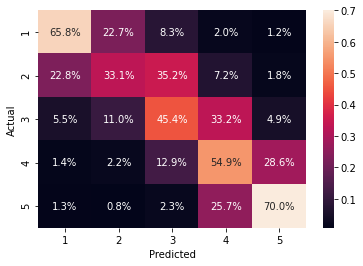

In [0]:
baseline = models.train_and_test(X_train=X_train,
                                 y_train=y_train,
                                 X_test=X_test,
                                 y_test=y_test,
                                 vectorizer=CountVectorizer(),
                                 classifier=MultinomialNB())

# 1 - N-Grams

Unigram + Bigrams

Classification Report - Training
              precision    recall  f1-score   support

           1     0.8803    0.7796    0.8269     25559
           2     0.9241    0.5828    0.7148     28269
           3     0.7697    0.7696    0.7696     48787
           4     0.7654    0.9141    0.8331     89012
           5     0.8995    0.8555    0.8770     80288

    accuracy                         0.8238    271915
   macro avg     0.8478    0.7803    0.8043    271915
weighted avg     0.8331    0.8238    0.8218    271915

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.7216    0.5672    0.6352      8611
           2     0.4165    0.1127    0.1775      9251
           3     0.4134    0.3290    0.3664     16367
           4     0.4982    0.7915    0.6115     29780
           5     0.7373    0.5823    0.6507     26630

    accuracy                         0.5559     90639
   macro avg     0.5574    0.4765    0.4882     90639
weighted avg

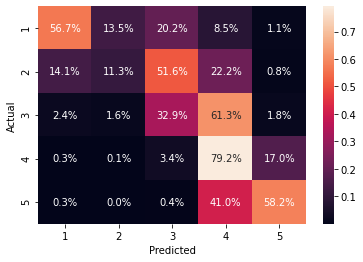

In [0]:
bigrams = models.train_and_test(X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                vectorizer=CountVectorizer(ngram_range=(1,2)),
                                classifier=MultinomialNB())

Unigram + Bigrams + Trigrams

Classification Report - Training
              precision    recall  f1-score   support

           1     0.9895    0.8509    0.9150     25559
           2     0.9950    0.7581    0.8605     28269
           3     0.9084    0.9039    0.9062     48787
           4     0.8661    0.9848    0.9216     89012
           5     0.9779    0.9578    0.9678     80288

    accuracy                         0.9262    271915
   macro avg     0.9474    0.8911    0.9142    271915
weighted avg     0.9317    0.9262    0.9255    271915

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.8293    0.3869    0.5277      8611
           2     0.3964    0.0261    0.0489      9251
           3     0.3015    0.1237    0.1754     16367
           4     0.4141    0.9010    0.5674     29780
           5     0.7950    0.4326    0.5603     26630

    accuracy                         0.4849     90639
   macro avg     0.5472    0.3741    0.3759     90639
weighted avg

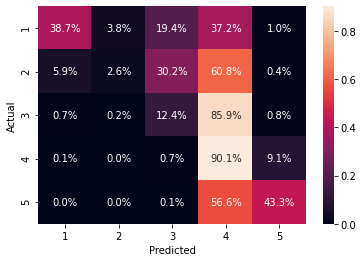

In [0]:
trigrams = models.train_and_test(X_train=X_train,
                                 y_train=y_train,
                                 X_test=X_test,
                                 y_test=y_test,
                                 vectorizer=CountVectorizer(ngram_range=(1,3)),
                                 classifier=MultinomialNB())

# 2 - Remove Non-Words/Numbers

Classification Report - Training
              precision    recall  f1-score   support

           1     0.6297    0.6964    0.6614     25559
           2     0.4999    0.4326    0.4638     28269
           3     0.5498    0.5446    0.5472     48787
           4     0.6234    0.6001    0.6116     89012
           5     0.6990    0.7416    0.7197     80288

    accuracy                         0.6236    271915
   macro avg     0.6004    0.6031    0.6007    271915
weighted avg     0.6203    0.6236    0.6213    271915

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.5997    0.6583    0.6277      8611
           2     0.3988    0.3376    0.3656      9251
           3     0.4690    0.4575    0.4632     16367
           4     0.5575    0.5438    0.5505     29780
           5     0.6596    0.7020    0.6801     26630

    accuracy                         0.5645     90639
   macro avg     0.5369    0.5398    0.5374     90639
weighted avg

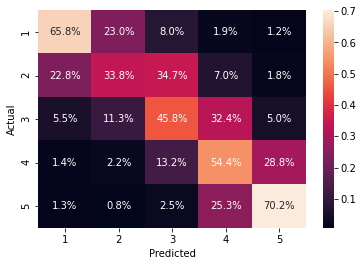

In [0]:
filtered = models.train_and_test(X_train=X_train,
                                 y_train=y_train,
                                 X_test=X_test,
                                 y_test=y_test,
                                 vectorizer=CountVectorizer(tokenizer=RegexpTokenizer(pattern=r'[a-zA-Z0-9]+').tokenize),
                                 classifier=MultinomialNB())

# 3 - Remove Stopwords

In [0]:
download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Classification Report - Training
              precision    recall  f1-score   support

           1     0.6370    0.7127    0.6727     25559
           2     0.5316    0.4376    0.4800     28269
           3     0.5644    0.5400    0.5519     48787
           4     0.6201    0.6224    0.6213     89012
           5     0.7021    0.7347    0.7181     80288

    accuracy                         0.6301    271915
   macro avg     0.6110    0.6095    0.6088    271915
weighted avg     0.6267    0.6301    0.6276    271915

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.6068    0.6686    0.6362      8611
           2     0.4084    0.3282    0.3639      9251
           3     0.4691    0.4406    0.4544     16367
           4     0.5477    0.5585    0.5530     29780
           5     0.6553    0.6885    0.6715     26630

    accuracy                         0.5623     90639
   macro avg     0.5375    0.5369    0.5358     90639
weighted avg

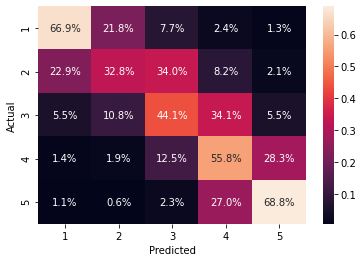

In [0]:
stopworded = models.train_and_test(X_train=X_train,
                                   y_train=y_train,
                                   X_test=X_test,
                                   y_test=y_test,
                                   vectorizer=CountVectorizer(stop_words=stopwords.words('english')),
                                   classifier=MultinomialNB())

# 4 - Stemming

Classification Report - Training
              precision    recall  f1-score   support

           1     0.6067    0.6869    0.6443     25559
           2     0.4746    0.4072    0.4383     28269
           3     0.5304    0.5239    0.5271     48787
           4     0.6092    0.5857    0.5972     89012
           5     0.6913    0.7315    0.7108     80288

    accuracy                         0.6086    271915
   macro avg     0.5824    0.5870    0.5835    271915
weighted avg     0.6051    0.6086    0.6061    271915

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.5885    0.6574    0.6211      8611
           2     0.3849    0.3273    0.3538      9251
           3     0.4666    0.4543    0.4604     16367
           4     0.5545    0.5389    0.5466     29780
           5     0.6584    0.6991    0.6782     26630

    accuracy                         0.5604     90639
   macro avg     0.5306    0.5354    0.5320     90639
weighted avg

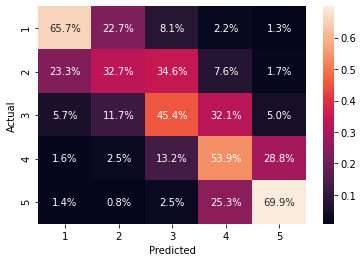

In [0]:
stemmed = models.train_and_test(X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                vectorizer=features.StemmedCountVectorizer(),
                                classifier=MultinomialNB())

# 5 - Lemmatization

In [0]:
download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Classification Report - Training
              precision    recall  f1-score   support

           1     0.6133    0.6889    0.6489     25559
           2     0.4873    0.4091    0.4448     28269
           3     0.5381    0.5326    0.5354     48787
           4     0.6140    0.6044    0.6092     89012
           5     0.7018    0.7305    0.7159     80288

    accuracy                         0.6164    271915
   macro avg     0.5909    0.5931    0.5908    271915
weighted avg     0.6131    0.6164    0.6141    271915

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.5905    0.6578    0.6223      8611
           2     0.3928    0.3236    0.3549      9251
           3     0.4679    0.4576    0.4627     16367
           4     0.5552    0.5510    0.5531     29780
           5     0.6644    0.6952    0.6795     26630

    accuracy                         0.5634     90639
   macro avg     0.5342    0.5370    0.5345     90639
weighted avg

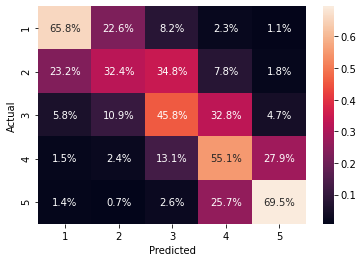

In [0]:
lemmatized = models.train_and_test(X_train=X_train,
                                   y_train=y_train,
                                   X_test=X_test,
                                   y_test=y_test,
                                   vectorizer=features.LemmatizedCountVectorizer(),
                                   classifier=MultinomialNB())

# Conclusion

We should
- Unigram + Bigram
- Remove non-words/numbers
- Remove stopwords
- Lemmatization